<a href="https://colab.research.google.com/github/LucaAPiattelli/UNI/blob/main/PY_06_UNI_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

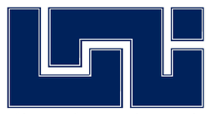

</center>

<center>
<font color="#091f60">
<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Avanzada con Power BI, R y Python

</font>
</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

<font color="#091f60">
<h1><b>
Agrupación - Clustering

</font>

### Instalar librerías necesarias

In [ ]:
pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.clustering import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Extracción de datos

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/UNI/main/Datasets/Agrupacion/clientes.csv")
data.head()

NameError: ignored

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7239 entries, 0 to 7238
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   genero               7239 non-null   object
 1   casado               7239 non-null   object
 2   edad                 7239 non-null   int64 
 3   graduado             7239 non-null   object
 4   profesion            7239 non-null   object
 5   experiencia_laboral  7239 non-null   int64 
 6   nivel_gasto          7239 non-null   object
 7   dependientes         7239 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 452.6+ KB


In [ ]:
train = data.sample(frac=0.75, random_state=0)
new = data.drop(train.index)

In [ ]:
train.reset_index(inplace=True, drop=True)
new.reset_index(inplace=True, drop=True)

In [ ]:
print("Datos para Modelar: " + str(train.shape))
print("Datos no vistos para Predicciones: " + str(new.shape))

Datos para Modelar: (5429, 8)
Datos no vistos para Predicciones: (1810, 8)


# Configurando entorno Pycaret

La función setup() inicializa el entorno en PyCaret y prepara los datos para el modelo seleccionado y la implementación de ese modelo. La función setup() debe ser llamada antes de ejecutar cualquier función de PyCaret. 

Se necesita un parámetro obligatorios: 
- Un marco de datos de Pandas 

Todos los demás parámetros son opcionales y se utilizan para personalizar el preprocesamiento de los datos.

Cuando se ejecuta setup(), el algoritmo de inferencia de PyCaret determina automáticamente los tipos de datos para todas las funciones en función de determinadas propiedades. 

El tipo de datos debe inferirse correctamente, pero no siempre es así. Para tener en cuenta esto, PyCaret muestra una tabla que contiene las características y sus tipos de datos inferidos después de que se ejecuta setup(). 

Si todos los tipos de datos están identificados correctamente, se debe presionar enter para continuar o se puede ingresar salir para finalizar la experiencia. Asegurarse de que los tipos de datos sean correctos es  fundamental, ya que se realiza automáticamente algunas tareas de preprocesamiento que son imperativas para cualquier experimento de aprendizaje automático. 

Estas tareas se realizan de forma diferente para cada tipo de datos, por lo que es muy importante que estén configuradas correctamente.

In [ ]:
modelo = setup(data, session_id = 123)

Description                 Value
0                               session_id                   123
1                            Original Data             (7239, 8)
2                           Missing Values                 False
3                         Numeric Features                     1
4                     Categorical Features                     7
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (7239, 45)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  8c4d
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

Una vez que la configuración se ha ejecutado con éxito, se muestra un cuadro de información que contiene elementos importantes. La mayor parte de la información está relacionada con el preprocesamiento que se construye cuando se ejecuta setup (). 

# Creación del Modelo

Todos los modelos que podemos utilizar son:

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

## Algoritmo K-means

Creamos el modelo con el comando create_model(), el único parámetro obligatorio es el nombre del modelo. Pero podemos definir:
* imputation_type: tipo de imputación en caso de valores faltantes
* categorical_features: variables categoricas
* ordinal_features: variables ordinales
* numeric_features: variables numéricas
* numeric_imputation: tipo de imputación de variables numéricas
* ignore_features: ignorar determinadas columnas
* normalize: determinar normalización
* normalize_method: determinar método de normalización
* pca: realizar un análisis de componentes principales

[muchas más](https://pycaret.readthedocs.io/en/latest/api/clustering.html)

In [ ]:
km = create_model('kmeans', num_clusters=4)
print(km)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.4969         22588.1021  ...           0             0

[1 rows x 6 columns]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


Ahora que hemos creado un modelo, nos gustaría asignar las etiquetas de grupo a nuestro conjunto de datos (train) para analizar los resultados. Lo lograremos usando la función assign_model(). 

In [ ]:
km_resultados = assign_model(km)
km_resultados.head()

genero casado  edad  ... nivel_gasto dependientes    Cluster
0  Masculino     No    22  ...        bajo            4  Cluster 2
1   Femenino     Si    67  ...        bajo            1  Cluster 1
2  Masculino     Si    67  ...        alto            2  Cluster 1
3  Masculino     Si    56  ...       medio            2  Cluster 0
4  Masculino     No    32  ...        bajo            3  Cluster 2

[5 rows x 9 columns]

In [ ]:
km_resultados.shape

(7239, 9)

# Visualización del modelo

La función plot_model() se puede utilizar para analizar diferentes aspectos del 
modelo de agrupamiento. Esta función toma un objeto de modelo entrenado y devuelve un gráfico.

## Visualización de los clusters

In [ ]:
plot_model(km, "cluster")

In [ ]:
plot_model(km, "tsne")

## Visualización del Codo

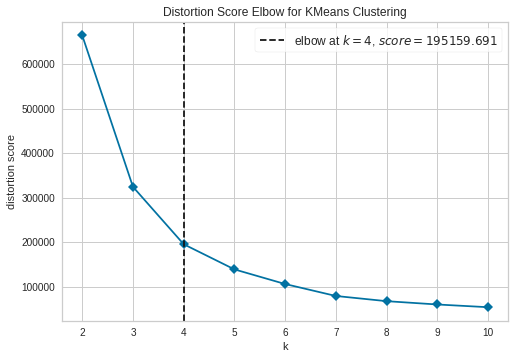

In [ ]:
plot_model(km, plot = 'elbow')

## Visualización de la Silueta

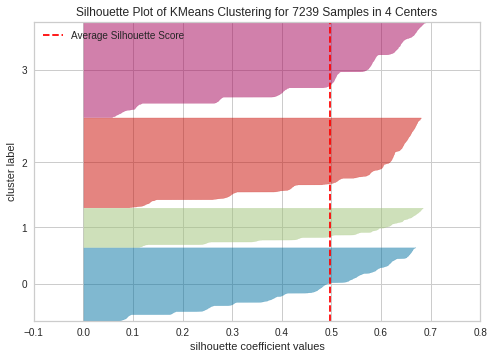

In [ ]:
plot_model(km, plot = 'silhouette')

## Visualización de la Distribución

La gráfica de distribución muestra el tamaño de cada grupo. Al pasar el cursor sobre las barras, verá el número de muestras asignadas a cada grupo. En el ejemplo anterior, podemos observar que el grupo 3 tiene el mayor número de muestras. También podemos usar la gráfica de distribución para ver la distribución de etiquetas de clusters en asociación con cualquier otra característica numérica o categórica. 

In [ ]:
plot_model(km, plot = 'distribution')

También podemos usar la misma gráfica para ver la distribución de cualquier característica continua. Vea un ejemplo a continuación:

In [ ]:
plot_model(km, plot = 'distribution', feature = 'profesion')

In [ ]:
plot_model(km, plot = 'distribution', feature = 'nivel_gasto')

# Predecir sobre datos no disponibles

In [ ]:
prediccion = predict_model(km, data=new)
prediccion.head()

genero casado  edad  ... nivel_gasto dependientes    Cluster
0  Masculino     No    22  ...        bajo            4  Cluster 2
1   Femenino     Si    55  ...       medio            4  Cluster 0
2  Masculino     Si    33  ...        bajo            2  Cluster 3
3   Femenino     No    58  ...       medio            3  Cluster 0
4  Masculino     Si    49  ...       medio            3  Cluster 0

[5 rows x 9 columns]

# Guardar el modelo

In [ ]:
save_model(km, "K-Means")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

# Ejecución en Power BI

Permite crear modelos sin la necesidad del paso **setup()**

In [ ]:
pbi_cluster = get_clusters(data)
print(pbi_cluster)

         genero casado  edad  ... nivel_gasto dependientes    Cluster
0     Masculino     No    22  ...        bajo            4  Cluster 2
1      Femenino     Si    67  ...        bajo            1  Cluster 1
2     Masculino     Si    67  ...        alto            2  Cluster 1
3     Masculino     Si    56  ...       medio            2  Cluster 3
4     Masculino     No    32  ...        bajo            3  Cluster 2
...         ...    ...   ...  ...         ...          ...        ...
7234  Masculino     No    22  ...        bajo            7  Cluster 2
7235  Masculino     No    35  ...        bajo            4  Cluster 0
7236   Femenino     No    33  ...        bajo            1  Cluster 2
7237   Femenino     No    27  ...        bajo            4  Cluster 2
7238  Masculino     Si    37  ...       medio            3  Cluster 0

[7239 rows x 9 columns]


In [ ]:
pbi_cluster = get_clusters(data, model = "kmeans")
print(pbi_cluster)

         genero casado  edad  ... nivel_gasto dependientes    Cluster
0     Masculino     No    22  ...        bajo            4  Cluster 0
1      Femenino     Si    67  ...        bajo            1  Cluster 1
2     Masculino     Si    67  ...        alto            2  Cluster 1
3     Masculino     Si    56  ...       medio            2  Cluster 2
4     Masculino     No    32  ...        bajo            3  Cluster 0
...         ...    ...   ...  ...         ...          ...        ...
7234  Masculino     No    22  ...        bajo            7  Cluster 0
7235  Masculino     No    35  ...        bajo            4  Cluster 3
7236   Femenino     No    33  ...        bajo            1  Cluster 3
7237   Femenino     No    27  ...        bajo            4  Cluster 0
7238  Masculino     Si    37  ...       medio            3  Cluster 3

[7239 rows x 9 columns]


In [ ]:
pbi_cluster = get_clusters(data, model = "kmeans", num_clusters = 5)
print(pbi_cluster)

         genero casado  edad  ... nivel_gasto dependientes    Cluster
0     Masculino     No    22  ...        bajo            4  Cluster 2
1      Femenino     Si    67  ...        bajo            1  Cluster 3
2     Masculino     Si    67  ...        alto            2  Cluster 3
3     Masculino     Si    56  ...       medio            2  Cluster 0
4     Masculino     No    32  ...        bajo            3  Cluster 2
...         ...    ...   ...  ...         ...          ...        ...
7234  Masculino     No    22  ...        bajo            7  Cluster 2
7235  Masculino     No    35  ...        bajo            4  Cluster 4
7236   Femenino     No    33  ...        bajo            1  Cluster 4
7237   Femenino     No    27  ...        bajo            4  Cluster 2
7238  Masculino     Si    37  ...       medio            3  Cluster 4

[7239 rows x 9 columns]


# Funciones adicionales

Pycaret permite acceder a variables creadas en el **setup()** a traves de un comando llamado **get_config()** en el cual podemos acceder a:
* X: Dataset transformado
* data_before_preprocess: data antes del preprocesado
* seed: semilla
* prep_pipe: El Pipeline configurado a traves de setup
* create_model_container: Matriz de resultados del modelo
* master_model_container: Configuración del modelo
* exp_name_log: nombre del experimento

In [ ]:
X = get_config("X")
X.head()

edad  genero_Femenino  ...  dependientes_8  dependientes_9
0  22.0              0.0  ...             0.0             0.0
1  67.0              1.0  ...             0.0             0.0
2  67.0              0.0  ...             0.0             0.0
3  56.0              0.0  ...             0.0             0.0
4  32.0              0.0  ...             0.0             0.0

[5 rows x 45 columns]

In [ ]:
data_before_preprocess = get_config("data_before_preprocess")
data_before_preprocess.head() 

genero casado  edad  ... experiencia_laboral nivel_gasto  dependientes
0  Masculino     No    22  ...                   1        bajo             4
1   Femenino     Si    67  ...                   1        bajo             1
2  Masculino     Si    67  ...                   0        alto             2
3  Masculino     Si    56  ...                   0       medio             2
4  Masculino     No    32  ...                   1        bajo             3

[5 rows x 8 columns]

In [ ]:
seed = get_config("seed")
seed

3859

In [ ]:
prep_pipe = get_config("prep_pipe")
prep_pipe

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='UNSUPERVISED_DUMMY_TARGET')),
                ('fix_perfect', 'passthrough'),
 

In [ ]:
data_pipe = prep_pipe.transform(train)
data_pipe.head()

edad  genero_Femenino  ...  dependientes_8  dependientes_9
0  36.0              1.0  ...             0.0             0.0
1  27.0              1.0  ...             0.0             0.0
2  41.0              0.0  ...             0.0             0.0
3  43.0              1.0  ...             0.0             0.0
4  20.0              0.0  ...             0.0             0.0

[5 rows x 45 columns]

In [ ]:
create_model_container = get_config("create_model_container")
create_model_container

[   Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
 0      0.4824         24577.7384  ...           0             0
 
 [1 rows x 6 columns]]

In [ ]:
master_model_container = get_config("master_model_container")
master_model_container

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
        random_state=3859, tol=0.0001, verbose=0)]

In [ ]:
exp_name_log = get_config("exp_name_log")
exp_name_log

'cluster-default-name'

![UNI](https://posgrado.uni.edu.ni/wp-content/uploads/2017/02/logo_opt-2.png)